# Import & Data Load

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/merged_accounts_data.csv")

C:\Users\PC\AppData\Local\Temp\ipykernel_24264\390590770.py:4: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/merged_accounts_data.csv")


# Preprocessing

In [2]:
# wide → long 변환 (연도별 값)
year_cols = [c for c in df.columns if c.isdigit()]  # '1981' ~ '2025'
df_long = df.melt(
    id_vars=["Symbol","Name","결산월","종류","계정","계정명","주기",
             "한국표준산업분류11차(대분류)","한국표준산업분류11차(중분류)","한국표준산업분류11차(소분류)",
             "한국표준산업분류코드11차(대분류)","한국표준산업분류코드11차(중분류)","한국표준산업분류코드11차(소분류)"],
    value_vars=year_cols,
    var_name="연도", value_name="값"
)

In [3]:
# 피벗: 계정과목을 열로
df_pivot = df_long.pivot_table(
    index=["Symbol","Name","연도",
           "한국표준산업분류11차(대분류)","한국표준산업분류11차(중분류)","한국표준산업분류11차(소분류)",
           "한국표준산업분류코드11차(대분류)","한국표준산업분류코드11차(중분류)","한국표준산업분류코드11차(소분류)"],
    columns="계정명", values="값", aggfunc="first"
).reset_index()

df_pivot.head()

계정명,Symbol,Name,연도,한국표준산업분류11차(대분류),한국표준산업분류11차(중분류),한국표준산업분류11차(소분류),한국표준산업분류코드11차(대분류),한국표준산업분류코드11차(중분류),한국표준산업분류코드11차(소분류),"CAPEX (E1, Manuf.)(백만원)",...,영업활동으로인한현금흐름(백만원),유동부채(백만원),유동비율(%),유동성장기부채(백만원),유동자산(백만원),이자보상배율(배),자기자본비율(%),총자산(백만원),총자산회전율(회),현금및현금성자산(백만원)
0,A000010,신한은행,1981,금융 및 보험업,금융업,은행 및 저축기관,K,64.0,641.0,NaN,...,17224316.072,NaN,NaN,NaN,NaN,NaN,2.09,5417531.418,NaN,489569.355
1,A000010,신한은행,1982,금융 및 보험업,금융업,은행 및 저축기관,K,64.0,641.0,NaN,...,-343427.607,NaN,NaN,NaN,NaN,NaN,2.08,6549358.659,0.07,584855.383
2,A000010,신한은행,1983,금융 및 보험업,금융업,은행 및 저축기관,K,64.0,641.0,NaN,...,791000.885,NaN,NaN,NaN,NaN,NaN,2.75,7307866.697,0.06,513538.481
3,A000010,신한은행,1984,금융 및 보험업,금융업,은행 및 저축기관,K,64.0,641.0,NaN,...,-285439.663,NaN,NaN,NaN,NaN,NaN,2.62,7848955.51,0.06,805794.911
4,A000010,신한은행,1985,금융 및 보험업,금융업,은행 및 저축기관,K,64.0,641.0,NaN,...,6861369.425,NaN,NaN,NaN,NaN,NaN,2.54,8317734.751,0.06,732155.993


In [4]:
df_pivot.columns

Index(['Symbol', 'Name', '연도', '한국표준산업분류11차(대분류)', '한국표준산업분류11차(중분류)',
       '한국표준산업분류11차(소분류)', '한국표준산업분류코드11차(대분류)', '한국표준산업분류코드11차(중분류)',
       '한국표준산업분류코드11차(소분류)', 'CAPEX (E1, Manuf.)(백만원)', 'EBIT(백만원)',
       'EBITDA(백만원)', 'EV(백만원)', 'FCF (E1)(백만원)', 'PBR(배)', 'PER(배)',
       'ROA(당기순이익)(%)', 'ROE(당기순이익)(%)', 'ROIC(%)', '기말발행주식수 (보통)(주)',
       '당기순이익(백만원)', '매출액(백만원)', '매출총이익(백만원)', '매출총이익률(%)', '부채비율(%)',
       '세후영업이익(백만원)', '영업이익률(%)', '영업활동으로인한현금흐름(백만원)', '유동부채(백만원)', '유동비율(%)',
       '유동성장기부채(백만원)', '유동자산(백만원)', '이자보상배율(배)', '자기자본비율(%)', '총자산(백만원)',
       '총자산회전율(회)', '현금및현금성자산(백만원)'],
      dtype='object', name='계정명')

In [5]:
df_pivot.columns = ['Symbol', 'Name', '연도', '산업분류(대분류)', '산업분류(중분류)',
    '산업분류(소분류)', '산업분류코드(대분류)', '산업분류코드(중분류)',
    '산업분류코드(소분류)', 'CAPEX', 'EBIT',
    'EBITDA', 'EV', 'FCF', 'PBR', 'PER',
    'ROA', 'ROE', 'ROIC', '기말발행주식수',
    '당기순이익', '매출액', '매출총이익', '매출총이익률', '부채비율', '세후영업이익',
    '영업이익률', '영업활동으로인한현금흐름', '유동부채', '유동비율', '유동성장기부채',
    '유동자산', '이자보상배율', '자기자본비율', '총자산', '총자산회전율',
    '현금및현금성자산']

df_pivot.columns

Index(['Symbol', 'Name', '연도', '산업분류(대분류)', '산업분류(중분류)', '산업분류(소분류)',
       '산업분류코드(대분류)', '산업분류코드(중분류)', '산업분류코드(소분류)', 'CAPEX', 'EBIT', 'EBITDA',
       'EV', 'FCF', 'PBR', 'PER', 'ROA', 'ROE', 'ROIC', '기말발행주식수', '당기순이익',
       '매출액', '매출총이익', '매출총이익률', '부채비율', '세후영업이익', '영업이익률', '영업활동으로인한현금흐름',
       '유동부채', '유동비율', '유동성장기부채', '유동자산', '이자보상배율', '자기자본비율', '총자산', '총자산회전율',
       '현금및현금성자산'],
      dtype='object')

In [6]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99166 entries, 0 to 99165
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        99166 non-null  object 
 1   Name          99166 non-null  object 
 2   연도            99166 non-null  object 
 3   산업분류(대분류)     99166 non-null  object 
 4   산업분류(중분류)     99166 non-null  object 
 5   산업분류(소분류)     99166 non-null  object 
 6   산업분류코드(대분류)   99166 non-null  object 
 7   산업분류코드(중분류)   99166 non-null  float64
 8   산업분류코드(소분류)   99166 non-null  float64
 9   CAPEX         6053 non-null   object 
 10  EBIT          74355 non-null  object 
 11  EBITDA        74355 non-null  object 
 12  EV            69671 non-null  object 
 13  FCF           6644 non-null   object 
 14  PBR           55624 non-null  object 
 15  PER           39922 non-null  object 
 16  ROA           70406 non-null  object 
 17  ROE           70158 non-null  object 
 18  ROIC          64683 non-nu

In [7]:
# 수치형 변수 타입 변환
for column in df_pivot.columns[9:]:
    df_pivot[column] = pd.to_numeric(df_pivot[column], errors="coerce")

df_pivot["연도"] = pd.to_numeric(df_pivot["연도"], errors="coerce")

In [8]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99166 entries, 0 to 99165
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        99166 non-null  object 
 1   Name          99166 non-null  object 
 2   연도            99166 non-null  int64  
 3   산업분류(대분류)     99166 non-null  object 
 4   산업분류(중분류)     99166 non-null  object 
 5   산업분류(소분류)     99166 non-null  object 
 6   산업분류코드(대분류)   99166 non-null  object 
 7   산업분류코드(중분류)   99166 non-null  float64
 8   산업분류코드(소분류)   99166 non-null  float64
 9   CAPEX         6053 non-null   float64
 10  EBIT          74355 non-null  float64
 11  EBITDA        74355 non-null  float64
 12  EV            69671 non-null  float64
 13  FCF           6644 non-null   float64
 14  PBR           55624 non-null  float64
 15  PER           39922 non-null  float64
 16  ROA           68008 non-null  float64
 17  ROE           66080 non-null  float64
 18  ROIC          62375 non-nu

In [9]:
### 핵심 지표 계산

# 현금흐름
df_pivot["CFO_NI"] = df_pivot["영업활동으로인한현금흐름"] / df_pivot["당기순이익"].replace(0, np.nan)
df_pivot["Accruals"] = df_pivot["당기순이익"] - df_pivot["영업활동으로인한현금흐름"]

# 성장률(YoY)
df_pivot = df_pivot.sort_values(["Symbol","연도"])
df_pivot["SalesGrowth"] = df_pivot.groupby("Symbol")["매출액"].pct_change()
df_pivot["EBITGrowth"] = df_pivot.groupby("Symbol")["세후영업이익"].pct_change()
df_pivot["NIGrowth"] = df_pivot.groupby("Symbol")["당기순이익"].pct_change()
df_pivot["SalesCAGR3Y"] = (df_pivot.groupby("Symbol")["매출액"]
                           .apply(lambda x: x.pct_change(3).add(1)**(1/3) - 1))

C:\Users\PC\AppData\Local\Temp\ipykernel_24264\3168844204.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x.pct_change(3).add(1)**(1/3) - 1))


In [10]:
# 가치배수
df_pivot["EV_EBITDA"] = df_pivot["EV"] / df_pivot["EBITDA"]

In [11]:
### 산업별 z-score 중립화

features = [
    'FCF', 'PBR', 'PER', 'ROA', 'ROE', 'ROIC', '매출총이익률', '영업이익률',
    '총자산회전율', 'CFO_NI', 'Accruals', 'SalesGrowth', 'EBITGrowth',
    '부채비율', '이자보상배율', 'NIGrowth', 'SalesCAGR3Y', 'EV_EBITDA',
    '유동비율'
]

for f in features:
    df_pivot[f+"_z"] = df_pivot.groupby(["연도", "산업분류(중분류)"])[f].transform(
        lambda x: (x - x.mean()) / x.std(ddof=0)
    )

In [12]:
# 결과 확인
print(df_pivot[["Symbol", "연도", "산업분류(중분류)"] + [f+"_z" for f in features]].head())

    Symbol    연도 산업분류(중분류)  FCF_z     PBR_z     PER_z     ROA_z     ROE_z  \
0  A000010  1981       금융업    NaN  1.373178  0.865892       NaN       NaN   
1  A000010  1982       금융업    NaN  1.487818  0.211123 -0.423324 -0.330436   
2  A000010  1983       금융업    NaN -0.200904  0.133910 -0.460941 -0.497389   
3  A000010  1984       금융업    NaN -0.668153  1.129126 -0.685908 -1.145332   
4  A000010  1985       금융업    NaN -0.265979  0.953835 -0.489840 -0.736597   

   ROIC_z  매출총이익률_z  ...  CFO_NI_z  Accruals_z  SalesGrowth_z  EBITGrowth_z  \
0     NaN -0.928057  ...  1.991693   -4.236613            NaN           NaN   
1     NaN -0.240005  ... -1.306430    2.392559            NaN           NaN   
2     NaN -0.312386  ...  2.914810   -4.688299            NaN           NaN   
3     NaN -0.715566  ... -2.643914    2.074487      -0.340281           NaN   
4     NaN -0.582079  ...  4.336727   -5.365459            NaN           NaN   

     부채비율_z  이자보상배율_z  NIGrowth_z  SalesCAGR3Y_z  EV_EBITDA_z 

In [13]:
# 전처리 완료된 데이터프레임 저장
df_pivot.to_csv("data/preprocessed_accounts_data.csv", index=False)

# Calculate Scores & Extract Top/Bottom 10 Companies

In [14]:
z_features = [f + "_z" for f in features]

# 2021~2023 데이터만 필터링
df_sub = df_pivot[df_pivot["연도"].isin([1981, 1982, 1983])].copy()

# 기업별 평균 z-score 계산
df_score = (
    df_sub.groupby(["Symbol", "Name"])[z_features]
        .mean()
        .reset_index()
)

# 최종 스코어 생성
df_score["FinalScore"] = df_score[z_features].mean(axis=1)

# 상위/하위 20개 기업 추출
top10 = df_score.nlargest(10, "FinalScore")
bottom10 = df_score.nsmallest(10, "FinalScore")

print("======== Top 10 ========")
print(top10[["Symbol", "Name", "FinalScore"]])

print("\n======== Bottom 10 ========")
print(bottom10[["Symbol", "Name", "FinalScore"]])

======== Top 10 ========
      Symbol     Name  FinalScore
281  A008890     보람은행    1.028249
153  A003350  한국화장품제조    0.838545
121  A002610     LGEI    0.780009
91   A001800   오리온홀딩스    0.650928
218  A005250   녹십자홀딩스    0.631005
177  A004010    롯데미도파    0.587383
36   A000570     금호건설    0.560202
279  A008750     범양식품    0.536790
166  A003690     코리안리    0.528354
233  A005680     삼영전자    0.518417

======== Bottom 10 ========
      Symbol    Name  FinalScore
280  A008810  LG종합금융   -0.852305
300  A012500  제일종합금융   -0.852305
158  A003500    삼진화학   -0.845463
203  A004730  진로종합식품   -0.714442
113  A002350   넥센타이어   -0.685059
294  A010050    우리종금   -0.674601
116  A002420    세기상사   -0.669600
173  A003960    사조대림   -0.621833
109  A002250  알보젠코리아   -0.593257
252  A006380     카프로   -0.576845


In [15]:
# 추천 결과 저장
top10.to_csv("outputs/top10.csv", index=False)
bottom10.to_csv("outputs/bottom10.csv", index=False)

<BarContainer object of 64 artists>

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50997 (\N{HANGUL SYLLABLE YUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLL

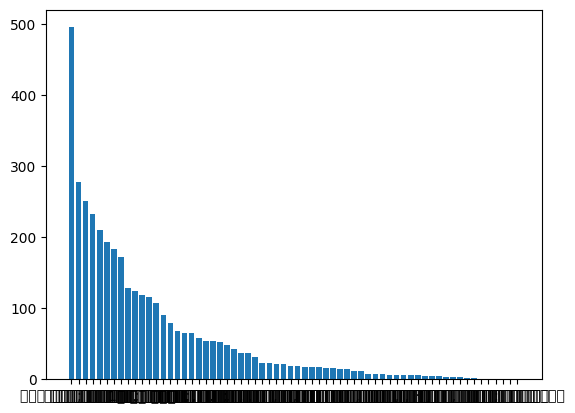

In [30]:
import matplotlib.pyplot as plt

df_drop = df_pivot.drop_duplicates("Symbol")
plt.bar(height=df_drop["산업분류(중분류)"].value_counts(), x=df_drop["산업분류(중분류)"].unique())